In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# Scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 평가함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# column counter
from collections import Counter
import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [3]:
import warnings

warnings.filterwarnings("ignore")

#### 데이터 불러오기

In [4]:
df_raw= pd.read_csv("../data/BigData/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

In [6]:
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw['diagnosis']

#### 데이터 불러오기

In [7]:
# test와 (valid, train)
df_temp_x, df_test_x, df_temp_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1220)

# valid, train
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_temp_x, df_temp_y, test_size=3/7, random_state=926)


print("train size is {}".format(df_train_x.shape))
print("train y size is {}".format(df_train_y.shape))
print("valid size is {}".format(df_valid_x.shape))
print("valid y size is {}".format(df_valid_y.shape))
print("test size is {}".format(df_test_x.shape))
print("test y size is {}".format(df_test_y.shape))


train size is (227, 30)
train y size is (227,)
valid size is (171, 30)
valid y size is (171,)
test size is (171, 30)
test y size is (171,)


### Default Classifier 생성

In [8]:
tree_uncustomized =  DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set : {:.3f}".format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Accuracy on training set : 1.000
Accuracy on validation set : 0.918


##### Depth 정하기

In [9]:
train_accuracy =[]; valid_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['ValidAccuracy']=valid_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.938,0.883
1,2,0.974,0.930
2,3,0.982,0.918
3,4,0.991,0.918
4,5,1.000,0.918
5,6,1.000,0.918
6,7,1.000,0.918
7,8,1.000,0.918
8,9,1.000,0.918
9,10,1.000,0.918


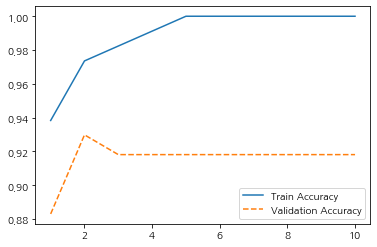

In [10]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

depth는 5로 결정

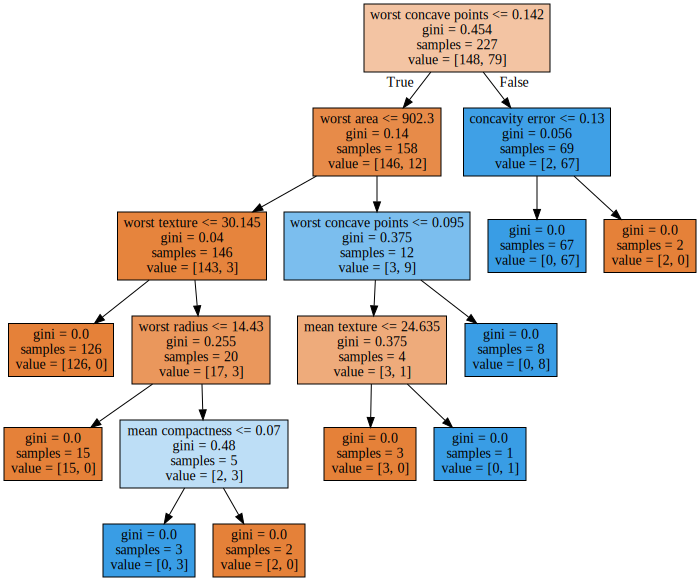

In [11]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### min_samples_split 정하기

In [12]:
train_accuracy =[]; valid_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth=5,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValidationAccuracy']=valid_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,ValidationAccuracy
0,10,0.987,0.912
1,20,0.978,0.924
2,30,0.974,0.930
3,40,0.974,0.930
4,50,0.974,0.930
5,60,0.974,0.930
6,70,0.965,0.924
7,80,0.965,0.924
8,90,0.965,0.924
9,100,0.965,0.924


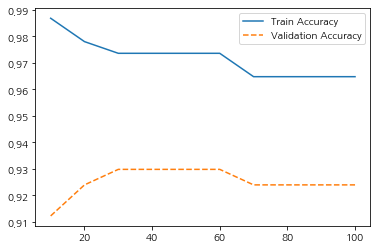

In [13]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

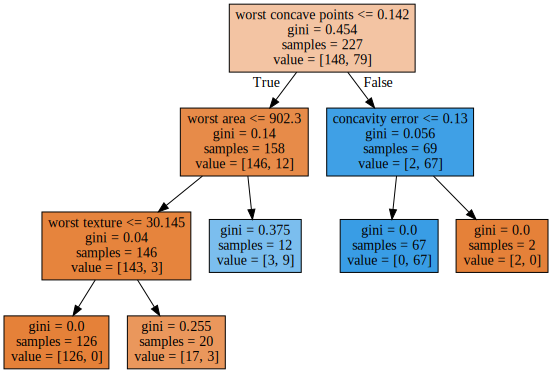

In [14]:
v_feature_name = df_train_x.columns

tree_graph=DecisionTreeClassifier(random_state=1234, max_depth=5,
                                 min_samples_split=30)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

split =30 선택

##### min_samples_leaf정하기

In [15]:
train_accuracy =[]; valid_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth=5,
                                min_samples_split=30,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValidationAccuracy']=valid_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,ValidationAccuracy
0,2,0.974,0.930
1,4,0.965,0.924
2,6,0.965,0.924
3,8,0.965,0.924
4,10,0.965,0.924
5,12,0.965,0.924
6,14,0.956,0.912
7,16,0.947,0.895
8,18,0.938,0.883
9,20,0.938,0.883


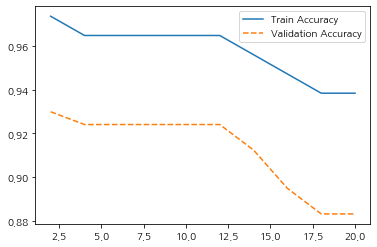

In [16]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

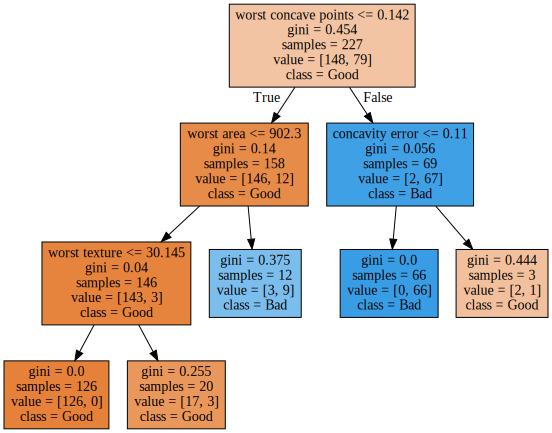

In [17]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=5,
                                 min_samples_split=30,
                                 min_samples_leaf=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_low.png", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_low.png") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

leaf=3 선택

##### 최종 모델 선정
**max_depth = 5, min_samples_split = 30, min_samples_leaf = 3**

In [18]:
tree_final = DecisionTreeClassifier(max_depth=5, min_samples_split=30,
                                   min_samples_leaf=3, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

최종 모델 시각화

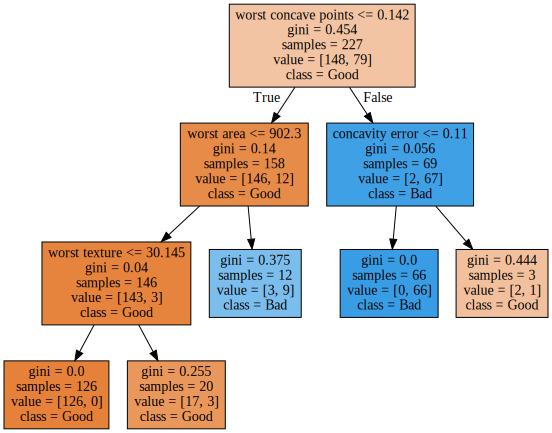

In [19]:

export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### 최종 모델 평가

In [25]:
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_valid_x, df_valid_y)))

Accuracy:0.969

Accuracy:0.924



In [20]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.942

Confusion matrix :
[[99  7]
 [ 3 62]]


설명변수의 중요도 확인하기


In [21]:
df_train_x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

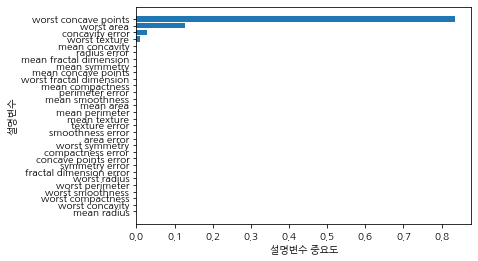

<Figure size 1800x1800 with 0 Axes>

In [22]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=True, inplace=True)
corrdinates =range(len(df_importance))
plt.barh(y=corrdinates, width = df_importance['Importance'])
plt.yticks (corrdinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')
plt.figure(figsize=(25,25))

worst concave points, worst area, concavity error 순으로 설명변수 중요도가 높았다.

# 결론

초기 데이터에서 범주형변수는 존재하지 않았으므로, dummy 데이터를 생성할 필요가 없었고, 전체 데이터의 수는 569개로 train, test, valid를 4:3:3으로 나누면 227,171,171개로 나누어 졌으며 train과 valid 데이터를 통해 모델의 계수들을 변경해 가며 모델을 생성한 결과 train 데이터에 대해서는 **96.9%**, valid데이터에 대해서는 **92.4%**의 정확도가 산출되었으며 최종으로 확인하는 데이터인 test데이터에 대해서는**94.2%**의 정확도가 산출되었습니다.

 